<a href="https://colab.research.google.com/github/Rimsha10/Price_Predictor/blob/master/stockpricepredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fast_ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.4 MB/s eta 0:00:00


In [ ]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 21.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


## Imports

In [ ]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.metrics import r2_score,roc_auc_score,mean_squared_error
import matplotlib.pyplot as plt
from fast_ml.model_development import train_valid_test_split
import pickle

## Dataset

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/growintern_internship/NFLX.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(data, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(data, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(data, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(data, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(data, *[[['Open', 'High'], ['High', 'Low'], ['Low', 'Close'], ['Close', 'Adj Close']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(data, *['Date', 'Open', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(data, *['Date', 'High', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(data, *['Date', 'Low', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(data, *['Date', 'Close', None], **{})
chart

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [ ]:
data.describe(include="object")

,Date
count,1009
unique,1009
top,2018-02-05
freq,1


In [ ]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Preprocessing

In [ ]:
data['Date']=pd.to_datetime(data['Date'])

In [ ]:
data['day_of_week'] = data['Date'].dt.day_of_week
data['month'] = data['Date'].dt.month
data['day_of_month'] = data['Date'].dt.day
data['year'] = data['Date'].dt.year



,Date,Open,High,Low,Close,Adj Close,Volume,day_of_week,month,day_of_month,year
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,0,2,5,2018
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,1,2,6,2018
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2,2,7,2018
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,3,2,8,2018
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,4,2,9,2018


In [ ]:
data.drop('Date',axis=1,inplace=True)

In [ ]:
feature=data.drop('Close',axis=1)
target=data['Close']

In [ ]:
feature=feature.drop('High',axis=1)
feature=feature.drop('Low',axis=1)

In [ ]:
feature=feature.drop('Open',axis=1)

## Correlation

<Axes: >

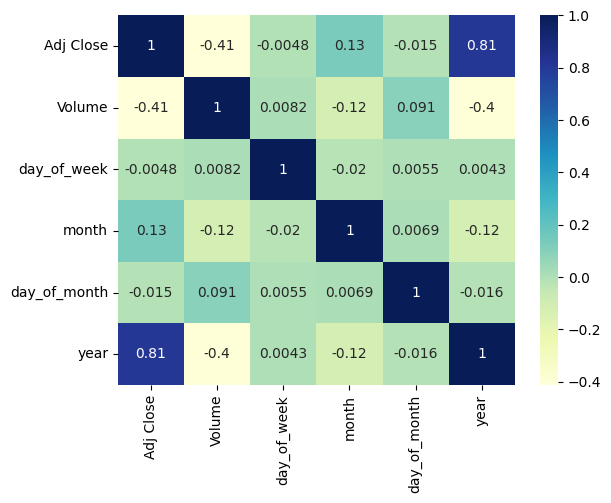

In [ ]:
sns.heatmap(feature.corr(numeric_only=False), cmap="YlGnBu", annot=True)

In [ ]:
feature.describe()

,Adj Close,Volume,day_of_week,month,day_of_month,year
count,1009.000000,1.009000e+03,1009.000000,1009.000000,1009.000000,1009.000000
mean,419.000733,7.570685e+06,2.014866,6.540139,15.717542,2019.595639
std,108.289999,5.465535e+06,1.402512,3.428207,8.759264,1.155997
min,233.880005,1.144000e+06,0.000000,1.000000,1.000000,2018.000000
25%,331.619995,4.091900e+06,1.000000,4.000000,8.000000,2019.000000
50%,378.670013,5.934500e+06,2.000000,7.000000,16.000000,2020.000000
75%,509.079987,9.322400e+06,3.000000,10.000000,23.000000,2021.000000
max,691.690002,5.890430e+07,4.000000,12.000000,31.000000,2022.000000


In [ ]:
feature.columns

Index(['Adj Close', 'Volume', 'day_of_week', 'month', 'day_of_month', 'year'], dtype='object')

## Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=42)

## Scaling (Standardization)

In [ ]:
scaler_lg = StandardScaler()
X_train_scaled=scaler_lg.fit_transform(X_train)
lg.fit(X_train_scaled,y_train)
X_test_scaled=scaler_lg.transform(X_test)

## Linear Regression Model

In [ ]:
lg=LinearRegression()

LinearRegression()

## Linear Regression model Evaluation

In [ ]:
y_pred=lg.predict(X_test_scaled)
rs=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
coeff=lg.coef_
print('R-squared: {}\nMSE score: {}\nCoefficients: {}\n'.format(rs,mse,coeff))
test_score=lg.score(X_test_scaled,y_test)
train_score=lg.score(X_train_scaled,y_train)
print('Train score: {}\nTest score: {}'.format(train_score,test_score))

R-squared: 1.0
MSE score: 6.935332926743043e-27
Coefficients: [ 1.07873962e+02  5.48637915e-15 -6.41845443e-15 -1.29720696e-14
  1.46483349e-15  8.56585565e-15]

Train score: 1.0
Test score: 1.0


In [ ]:
df=pd.DataFrame({"y_pred":y_pred,"y_test":y_test,"y_test-y_pred":abs(y_test-y_pred)})
df

,y_pred,y_test,y_test-y_pred
628,524.092945,509.640015,14.452930
631,508.903300,494.730011,14.173289
741,515.148243,500.859985,14.288258
514,392.092813,380.070007,12.022806
365,325.904280,315.100006,10.804274
...,...,...,...
778,518.897287,504.540009,14.357278
370,346.972132,335.779999,11.192133
7,275.883388,266.000000,9.883388
155,361.815404,350.350006,11.465398


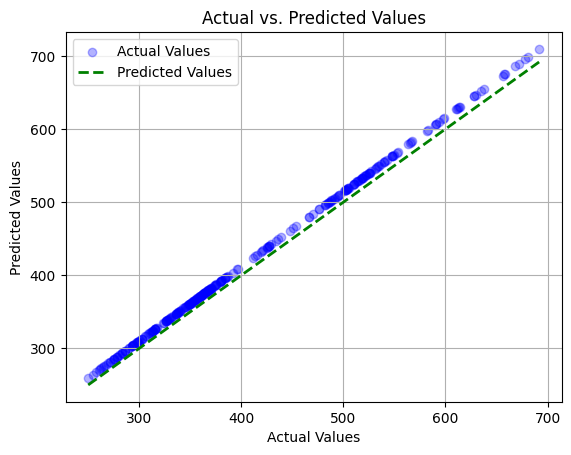

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already trained your model and obtained predictions
y_actual = y_test  # Actual target values from your test data

# Calculate the residuals (errors)
residuals = y_actual - y_pred

# Create a scatter plot of actual vs. predicted values
plt.scatter(y_actual, y_pred, color='blue', alpha=0.3)
#plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], color='blue', linestyle='--', linewidth=2)
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='green', linestyle='--', linewidth=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(['Actual Values','Predicted Values'],loc='best')
plt.grid(True)

plt.show()


In [ ]:
df_data=feature.join(target)
df_data.values

array([[2.54259995e+02, 1.18961000e+07, 0.00000000e+00, ...,
        5.00000000e+00, 2.01800000e+03, 2.54259995e+02],
       [2.65720001e+02, 1.25958000e+07, 1.00000000e+00, ...,
        6.00000000e+00, 2.01800000e+03, 2.65720001e+02],
       [2.64559998e+02, 8.98150000e+06, 2.00000000e+00, ...,
        7.00000000e+00, 2.01800000e+03, 2.64559998e+02],
       ...,
       [4.29480011e+02, 1.43460000e+07, 2.00000000e+00, ...,
        2.00000000e+00, 2.02200000e+03, 4.29480011e+02],
       [4.05600006e+02, 9.90520000e+06, 3.00000000e+00, ...,
        3.00000000e+00, 2.02200000e+03, 4.05600006e+02],
       [4.10170013e+02, 7.78240000e+06, 4.00000000e+00, ...,
        4.00000000e+00, 2.02200000e+03, 4.10170013e+02]])

## Train-Test-Valid Split

In [ ]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df_data, target = 'Close', train_size=0.7, valid_size=0.15, test_size=0.15)

## Scaling (Standardization)

In [ ]:
scaler_knn = StandardScaler()
X_train_scaled=scaler_knn.fit_transform(X_train)

In [ ]:
X_test_scaled=scaler_knn.transform(X_test)
X_valid_scaled=scaler_knn.transform(X_valid)

## KNN Model

# Hyperparameter Selection

In [ ]:
# Define your model
model = KNeighborsRegressor()

# Define a grid of hyperparameters to search
param_grid = {
  'n_neighbors': np.arange(3,15,1),  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'p': [1, 2]  # Parameter for the Minkowski distance metric (1 for Manhattan, 2 for Euclidean)
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True,)

# Fit the GridSearchCV object to your data
grid_search.fit(X_valid_scaled, y_valid)  # X_train and y_train are your training data

# Get the best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test_scaled)
# Evaluate the best model on your test data
mse = mean_squared_error(y_test,y_pred )  # X_test and y_test are your test data
rscore=r2_score(y_test,y_pred)
mean_test_score=grid_search.cv_results_['mean_test_score']
mean_train_score=grid_search.cv_results_['mean_train_score']

## Model Evaluation

In [ ]:
knn=KNeighborsRegressor(n_neighbors= 5, p= 1, weights= 'distance')
knn.fit(X_train_scaled,y_train)

KNeighborsRegressor(p=1, weights='distance')

In [ ]:
test_score=knn.score(X_test_scaled,y_test)
train_score=knn.score(X_train_scaled,y_train)
valid_score=knn.score(X_valid_scaled,y_valid)
print('Best_params: {}\nMSE score: {}\nBest_model: {}\nTrain score: {}\nTest score: {}\nValid score: {}'.format(best_params,mse,best_model,train_score,test_score,valid_score))

Best_params: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
MSE score: 6.935332926743043e-27
Best_model: KNeighborsRegressor(n_neighbors=3, p=1, weights='distance')
Train score: 1.0
Test score: 0.9735490722496396
Valid score: 0.9841956015413623


In [ ]:
pickle.dump(lg, open('/content/drive/MyDrive/growintern_internship/lg.pkl', 'wb'))
pickle.dump(knn, open('/content/drive/MyDrive/growintern_internship/knn.pkl', 'wb'))
pickle.dump(scaler_lg, open('/content/drive/MyDrive/growintern_internship/scaler_lg.pkl', 'wb'))
pickle.dump(scaler_knn, open('/content/drive/MyDrive/growintern_internship/scaler_knn.pkl', 'wb'))


In [ ]:
%%writefile app.py
import streamlit as st
import pickle
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
import datetime as dt
from PIL import Image
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import base64


#image = Image.open('ock.jpg')
#st.image(image,width=700,use_column_width='never')
model1= pickle.load(open('best_model.pkl', 'rb'))
model2=pickle.load(open('lg.pkl', 'rb'))


def user_report():
  Adjusted_Close = st.sidebar.slider('Adjusted Close', 100,1000, 1 )
  Volume = st.sidebar.slider('Volume', 1000,50000000, 1 )
  Date = st.sidebar.date_input('Date')
  month = Date.month
  day_of_month =  Date.day
  day_of_week = Date.strftime("%w")
  year = Date.year

  user_report_data = {
      'Adj Close':Adjusted_Close,
      'Volume':Volume,
      'day_of_week':day_of_week,
      'month':month,
      'day_of_month':day_of_month,
      'year':year,
  }
  report_data = pd.DataFrame(user_report_data, index=[0])
  return report_data

def select_algo():
  algos=st.sidebar.radio('Pick algorithm:', ['KNN','Linear Regression'])
  return algos

#### Interface ####

st.title('Stock Price Prediction :chart_with_upwards_trend:')
st.header('Stock Price Data :clipboard:')
st.sidebar.header(':red[Algorithm] :question:',divider='grey')
algo=select_algo()
print(algo)
st.sidebar.header(':red[Stock Price Data] :clipboard:',divider='grey')
user_data = user_report()
st.write(user_data)
if st.sidebar.button('Submit'):
# FUNCTION
  scaler = StandardScaler()
  X_scaled=scaler.fit_transform(user_data.values)
  if algo=='KNN':
    close = model1.predict(X_scaled)
  else:
    close = model2.predict(X_scaled)
  st.header('Predicted Closing price')
  st.subheader(':heavy_dollar_sign:'+str(np.round(close[0], 2)))

Writing app.py
